In [ ]:
# mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics

#machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC(C=100.0))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
# reading the training and testing set
train = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/train.csv')
test = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/test.csv')
train.head()

,news,source,label
0,ಈ ವ್ಯಕ್ತಿ ಪ್ರೌಢಶಾಲೆಯಲ್ಲಿ 26 ಬಾರಿ ಫೇಲ್ ಆಗಿದ್ದಾನೆ,oneindia,0
1,ಸರ್ಕಾರದ ಜೊತೆ ಉದ್ಧವ್ ಠಾಕ್ರೆಯ ಪಕ್ಷವನ್ನೂ ವಶಪಡಿಸ್ಕ...,asianet,1
2,ಹುಲಿ ಸಂರಕ್ಷಿತ ಪ್ರದೇಶ ಘೋಷಣೆ ಸಿಎಂ ನಿರ್ಧಾರಕ್ಕೆ ಉಮ...,prajavani,1
3,108 ಗಂಟೆಯಲ್ಲಿ 75 ಕಿಮೀ ರಸ್ತೆ ನಿರ್ಮಾಣದ ಗುರಿ ಗಿನ್...,asianet,1
4,ಬಾಳಾಠಾಕ್ರೆ ತಿಲಕ ಇಡುತ್ತಿರುವುದು ಏಕನಾಥ್ ಶಿಂಧೆಗಲ್...,asianet,0


In [ ]:
# removing the null rows
train = train.dropna()
test = test.dropna()

In [ ]:
# printing the shape of the training and the testing set
print(train.shape, test.shape)

(2299, 3) (500, 3)


In [ ]:
# splitting the datasets into dependent and independent variables
X_train = train.news.values
y_train = train.label.values
X_test = test.news.values
y_test = test.label.values

In [ ]:
# converting the news headlines into word vectors using TF-IDF
vectoriser = TfidfVectorizer()
X_train = vectoriser.fit_transform(X_train)
X_test = vectoriser.transform(X_test)
X_train

<2299x2021 sparse matrix of type '<class 'numpy.float64'>'
	with 14267 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
# defining list of Machine Learning models and using them to make predictions on the testing set
model_list=['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naive Bayes']
acc_list=[]
auc_list=[]
cm_list=[]
class_report=[]
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr , tpr ,_thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    class_report.append(classification_report(y_test,y_pred))
    cm_list.append(confusion_matrix(y_test,y_pred))

In [ ]:
# displaying classification report for all the models
for i in range(len(class_report)):
  print(model_list[i] + ":")
  print(class_report[i] + "\n\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.43      0.58       200
           1       0.72      0.97      0.82       300

    accuracy                           0.75       500
   macro avg       0.81      0.70      0.70       500
weighted avg       0.79      0.75      0.73       500



SVM:
              precision    recall  f1-score   support

           0       0.78      0.51      0.61       200
           1       0.73      0.91      0.81       300

    accuracy                           0.75       500
   macro avg       0.76      0.71      0.71       500
weighted avg       0.75      0.75      0.73       500



KNN:
              precision    recall  f1-score   support

           0       0.41      0.96      0.57       200
           1       0.73      0.07      0.13       300

    accuracy                           0.43       500
   macro avg       0.57      0.52      0.35       500
weighted avg       0.60      0.43      

In [ ]:
# displaying accuracy and AUC for all the models
result_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.752,0.70
1,SVM,0.746,0.71
2,KNN,0.428,0.52
3,Decision Tree,0.672,0.66
4,Random Forest,0.714,0.68
5,Naive Bayes,0.606,0.64


[[ 86 114]
 [ 10 290]]
[[101  99]
 [ 28 272]]
[[192   8]
 [278  22]]
[[122  78]
 [ 86 214]]
[[108  92]
 [ 51 249]]
[[165  35]
 [162 138]]


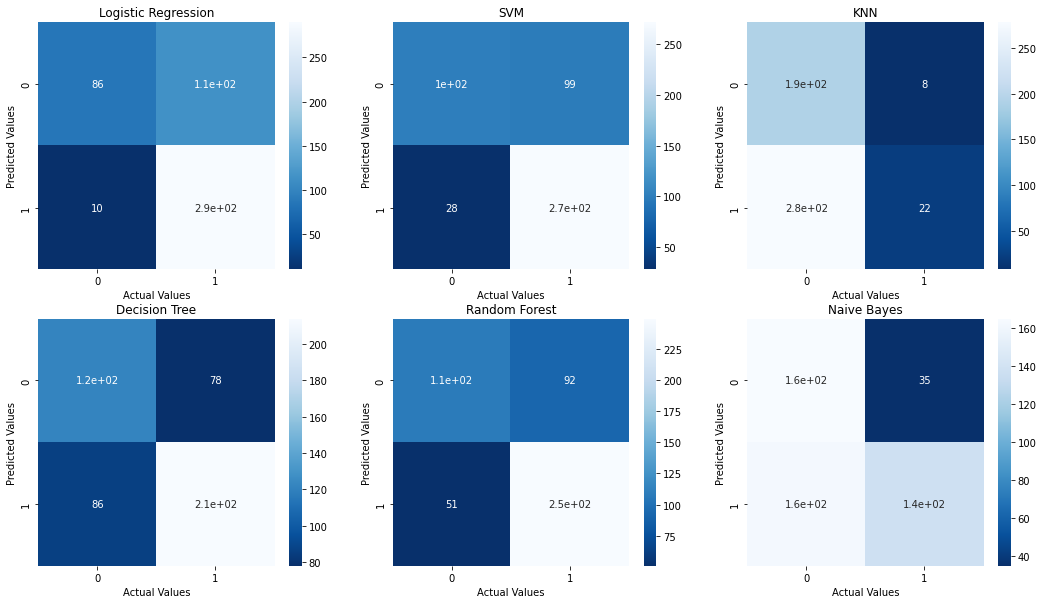

In [ ]:
# displaying confusion matrix for all the models
fig=plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
   cm = cm_list[i]
   model = model_list[i]
   sub = fig.add_subplot(2,3,i+1).set_title(model)
   cm_plot = sns.heatmap(cm,annot=True,cmap='Blues_r')
   cm_plot.set_xlabel('Actual Values')
   cm_plot.set_ylabel('Predicted Values')
   print(cm_list[i])